# Sesión 8: Intro a Machine Learning


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## K-Medias

In [11]:
# Cargamos datos
df = pd.read_csv("/content/drive/MyDrive/datasets_BEDU/Remoto crimenes_locacion.csv")
df.head()

,codigo_crimen,latitud,longitud
0,8,-15.068712,0.157991
1,0,-4.065913,12.491768
2,1,3.141179,-12.090601
3,8,8.806998,14.316892
4,3,-5.773641,15.487286


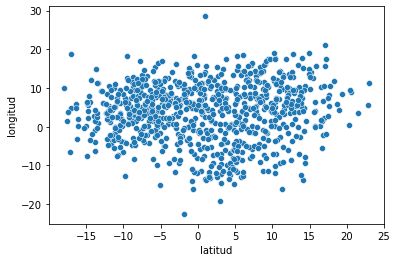

In [12]:
# Observemos nuestros datos
sns.scatterplot(x = df['latitud'], y = df['longitud']);

In [13]:
# Cargo biblioteca
from sklearn.cluster import KMeans

In [14]:
# Quiero clasificar en 6 grupos k = 6
k_means = KMeans(n_clusters = 6, max_iter = 10_000) #Iniciamos con 10 mil iteraciones
k_means.fit(df[['latitud', 'longitud']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
# Observemos las coordenadas de los 6 ptos que mejor se ajustaron
centers = k_means.cluster_centers_
centers

array([[-6.12981717,  9.43195955],
       [ 4.61502679, -8.87506359],
       [12.72711956,  4.53877175],
       [ 1.22634143,  2.52100074],
       [-9.85740469,  0.42690554],
       [ 7.75847662, 12.89387739]])

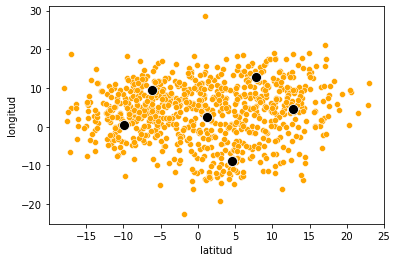

In [16]:
# Visualizamos los centroides
sns.scatterplot( data = df, x = 'latitud', y = 'longitud', color = 'orange');
sns.scatterplot( x = centers[:,0], y = centers[:,1], color = 'black', s = 100);

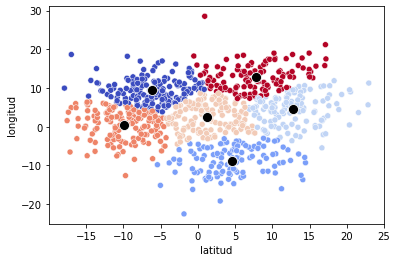

In [17]:
# Visualizamos los grupos área cada centroide
classificacion = k_means.predict(df[['latitud', 'longitud']]);
sns.scatterplot(data = df, x = 'latitud', y = 'longitud', hue = classificacion, palette = 'coolwarm', legend = False);
sns.scatterplot( x = centers[:,0], y = centers[:,1], color = 'black', s = 100);

### -Ejercicio

In [18]:
df = pd.read_csv("/content/drive/MyDrive/datasets_BEDU/Remoto distribucion_usuarios-1.csv")
df.head() 

,codigo_de_usuario,producto_1,producto_2,producto_3,producto_4,latitud,longitud
0,1,0,0,0,0,14.277305,-5.958917
1,2,0,0,1,0,-9.958963,1.036839
2,3,0,0,1,0,7.859551,1.932572
3,4,1,1,1,1,-8.989976,6.969268
4,5,1,0,0,0,-6.641690,-0.777759


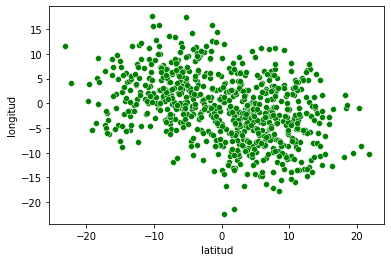

In [19]:
# Visualizamos los datos
sns.scatterplot( data = df, x = 'latitud', y = 'longitud', color = 'Green');

In [20]:
# Hacemos la calsificacion para 7 centroides
k_means = KMeans(n_clusters = 7, max_iter = 100_000)
k_means.fit(df[['latitud', 'longitud']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100000,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
# observamos las coordenadas de los centroides
centros = k_means.cluster_centers_
centros

array([[  5.52573139, -10.82412276],
       [  7.24032885,   4.68397407],
       [ -5.62963967,  -0.96472713],
       [ -6.35412715,   8.36004507],
       [  3.05575166,  -2.17165027],
       [ 12.602115  ,  -4.50540568],
       [-14.50218331,   0.85843488]])

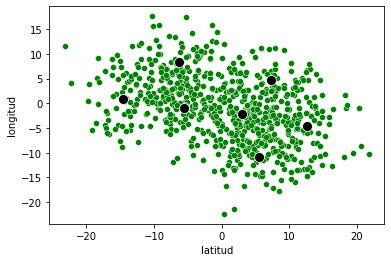

In [22]:
# Visualizamos los centroides
sns.scatterplot( data = df, x = 'latitud', y= 'longitud', color = 'Green');
sns.scatterplot( x= centros[:,0], y = centros[:,1], color = 'black', s = 100);

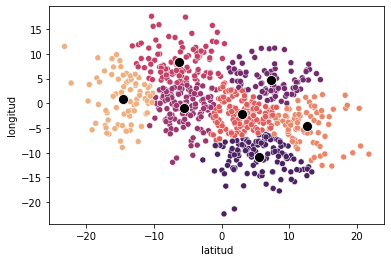

In [23]:
# Visualizamos los clusters para cada centroide
classificacion = k_means.predict(df[['latitud', 'longitud']])
sns.scatterplot( data = df, x = 'latitud', y= 'longitud', color = 'Green', hue = classificacion, palette = 'flare_r', legend = False);
sns.scatterplot( x= centros[:,0], y = centros[:,1], color = 'black', s = 100);

In [24]:
# Agregamos los clusters a nuestro data frame
df['group'] = classificacion
df.head()

,codigo_de_usuario,producto_1,producto_2,producto_3,producto_4,latitud,longitud,group
0,1,0,0,0,0,14.277305,-5.958917,5
1,2,0,0,1,0,-9.958963,1.036839,6
2,3,0,0,1,0,7.859551,1.932572,1
3,4,1,1,1,1,-8.989976,6.969268,3
4,5,1,0,0,0,-6.641690,-0.777759,2


In [25]:
# Agregamos el total comprado de los porductos para cada cluster
df['total'] = df['producto_1'] + df['producto_2'] + df['producto_3'] + df['producto_4']
df.head()

,codigo_de_usuario,producto_1,producto_2,producto_3,producto_4,latitud,longitud,group,total
0,1,0,0,0,0,14.277305,-5.958917,5,0
1,2,0,0,1,0,-9.958963,1.036839,6,1
2,3,0,0,1,0,7.859551,1.932572,1,1
3,4,1,1,1,1,-8.989976,6.969268,3,4
4,5,1,0,0,0,-6.641690,-0.777759,2,1


In [26]:
# Veamos cuantos productos hay por cluster
df['group'].value_counts()

4    144
2    132
0    116
3    109
1     87
5     83
6     78
Name: group, dtype: int64

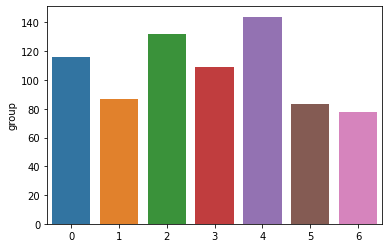

In [27]:
# Graficamos
counts = df['group'].value_counts()
sns.barplot( x = counts.index , y = counts);

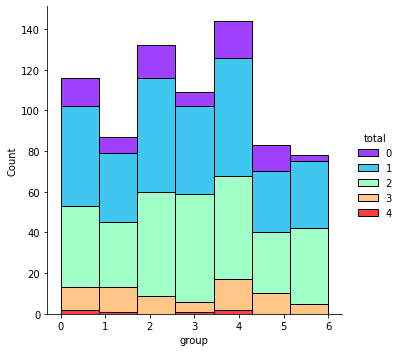

In [28]:
# Graficamos apiladamente, dividendo por el numero total de porductos comprados
sns.displot( data = df,  x = 'group', hue = 'total', palette = 'rainbow', bins = 7, multiple = 'stack');

### Clasificación Supervisada (Regresión logaritmica, clasificación binaria)

In [30]:
# Cargamos datos cancerigenos
df = pd.read_csv("/content/drive/MyDrive/datasets_BEDU/Remoto breast_cancer_wisconsin.csv", index_col = 0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [32]:
# Quitamos columna que no nos sirve ni utilizaremos
df = df.drop(columns = ['Unnamed: 32'])

In [33]:
# Notese que la columna diagnosisi indica si el quiste encontrado es maligno o benigno (es una variable binaria)
# Rescirbimos la columna en términos numericos para manipularla mejor
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [47]:
# Para la regresion logistica indicamos las variables independientes (explicatvas) y la dependiente (binaria)
# Indicamos datos de variables explicativas
X = df.drop(columns = ['diagnosis'])
y = df['diagnosis']

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  train_test_split

In [48]:
#Establecemos datos del modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 30% para tamaño de prueba

In [49]:
# Entrenamos el modelo
logreg = LogisticRegression(max_iter = 10_000)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
# Realizamos la prediccion con los datos de prueba
# Es decir que asigne si el quiste es Maligno o Benigno
y_pred = logreg.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1])

In [51]:
# Veamos el R-square
logreg.score(X_test, y_test)

0.935672514619883

### Matriz de Confusión

In [ ]:
from sklearn import metrics

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

In [ ]:
# Graficamos
fig, ax = plt.subplots(figsize = (6,6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot_kws = {'size' = 20}, fmt = 'g', cmap = 'Blues', cbar = False)
plt.xlabel('Estimado por modelo', fontsize = 15)
plt.ylabel('Realidad', fontsize = 15)

In [ ]:
# Observemos las metricas para comprobar las significancia del modelo
print(metrics.precision_score(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))

In [ ]:
# Para especificidad lo hacemos a mano
tn, fp, fn, tp = cnf_matrix.ravel()
print(tn/(tn + fp))